# Case study on Pre-processing

### Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset(titanic)
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load the dataset into python environment

In [2]:
data=pd.read_csv('titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2. Make ‘PassengerId’ as the index column

In [6]:
 data=pd.read_csv('titanic_dataset.csv',index_col='PassengerId')

In [7]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Check the basic details of the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [10]:
data.shape

(891, 11)

In [11]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

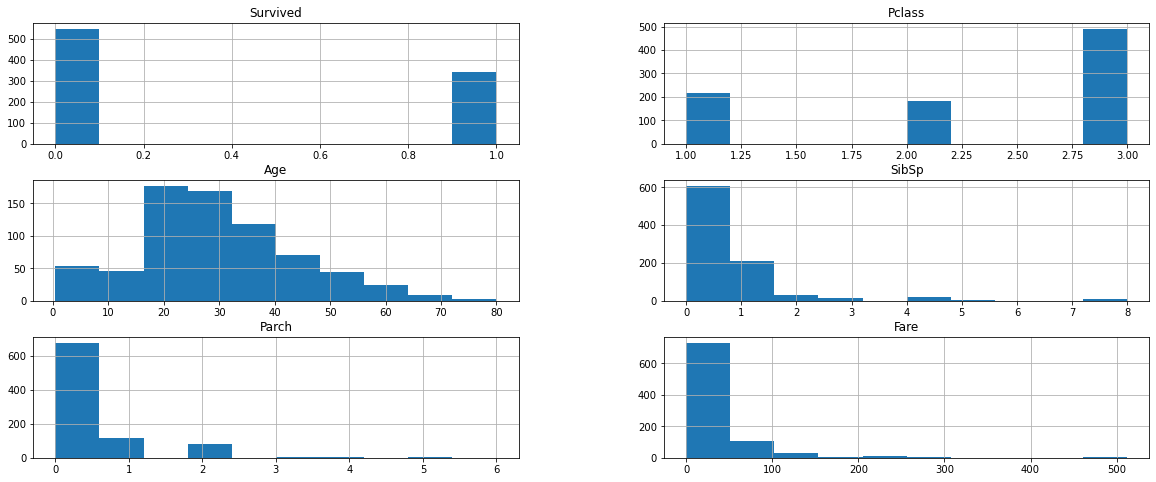

In [14]:
data.hist(figsize=(20,8))

## Inference:
    1. Dataset contains 11 features .
    2. Datatypes include Integer 64bit, Float, Object.
    3. Also the dataset contains null values in Age, Embarked, Cabin.

## 4. Fill in all the missing values present in all the columns in the dataset

### From the above null value checking , we understood that Age, Cabin, Embarked contains  missing values 

### Filling null values in Age

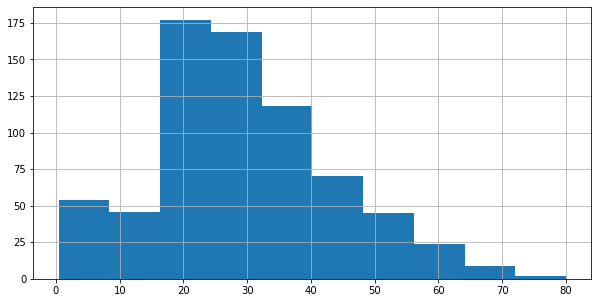

In [15]:
freqgraph=data['Age']
freqgraph.hist(figsize=(10,5))
plt.show()

In [16]:
data['Age']=data['Age'].fillna(data['Age'].median())

### Filling missing values in Embarked

In [17]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].value_counts().index[0])

In [ ]:
### Also we can  fill the values using mode()too.

### Filling null values in Cabin

In [18]:
data['Cabin'] = data['Cabin'].fillna('Unknown')

In [ ]:
### The column Cabin contains more than 70 % of null values, so we can either fill the missing data or drop the column.

In [19]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [20]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Unknown,S


## 5. Check and handle outliers in at least 3 columns in the dataset

### Pclass column

Text(0.5, 1.0, 'Box plot of Pclass')

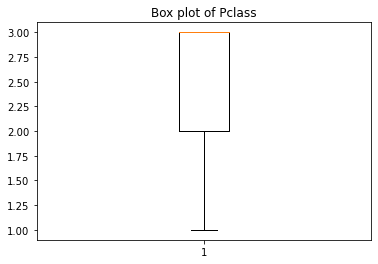

In [21]:
d1=data
plt.boxplot(d1['Pclass'])
plt.title("Box plot of Pclass")

### Infernce :
     Figure shows that there is no outlier in the Pclass column.

### Checking Age

Text(0.5, 1.0, 'Box plot of Age')

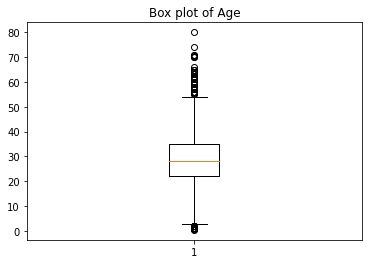

In [22]:
plt.boxplot(d1['Age'])
plt.title("Box plot of Age")

### Checking SibSp

Text(0.5, 1.0, 'Box plot of SibSp')

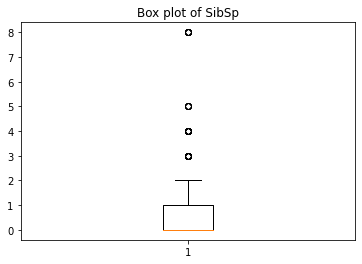

In [23]:
plt.boxplot(d1['SibSp'])
plt.title("Box plot of SibSp")

### Inference:
     Both Age and SibSp shows a huge quantity of outlier values.

### Handling outliers in Age column

In [24]:
Q1=np.percentile(d1['Age'],25,interpolation='midpoint')
Q2=np.percentile(d1['Age'],50,interpolation='midpoint')
Q3=np.percentile(d1['Age'],75,interpolation='midpoint')

In [25]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [26]:
d1['Age'].median()

28.0

In [27]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("Lower limit of Age",low_lim)
print("Upper limit of Age",up_lim)

Lower limit of Age 2.5
Upper limit of Age 54.5


In [28]:
outlier=[]
for x in d1['Age']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)

In [29]:
print('There are',len(outlier),'outliers in Age column.','\n')
print('Outliers are:',outlier)

There are 66 outliers in Age column. 

Outliers are: [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [30]:
ind1=d1['Age']>up_lim
d1.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [ ]:
ind2=(d1['Age']<low_lim)
d1.loc[ind2].index

In [31]:
d1.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880,8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],inplace=True)

Text(0.5, 1.0, 'Box plot of Age')

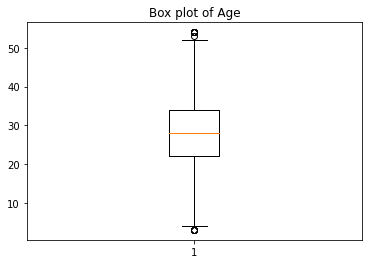

In [32]:
plt.boxplot(d1['Age'])
plt.title("Box plot of Age")

### Handling outliers in SibSp column

Text(0.5, 1.0, 'Box plot of SibSp')

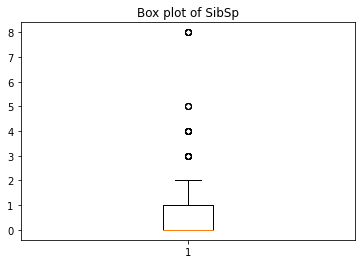

In [33]:
plt.boxplot(d1['SibSp'])
plt.title("Box plot of SibSp")

In [34]:
Q1=np.percentile(d1['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(d1['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(d1['SibSp'],75,interpolation='midpoint')

In [35]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [36]:
d1['SibSp'].median()

0.0

In [37]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("Lower limit of Siblings/Spouse",low_lim)
print("Upper limit of Siblings/Spouse",up_lim)

Lower limit of Siblings/Spouse -1.5
Upper limit of Siblings/Spouse 2.5


In [38]:
outlier=[]
for x in d1['SibSp']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)

In [39]:
print('There are',len(outlier),'Outliers in Siblings/Spouse column','\n')
print('Outliers are:',outlier)

There are 39 Outliers in Siblings/Spouse column 

Outliers are: [3, 3, 4, 5, 3, 4, 5, 3, 3, 8, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 3, 5, 3, 4, 4, 3, 5, 4, 3, 4, 8, 4, 3, 8, 4, 8]


In [40]:
ind1=d1['SibSp']>up_lim
d1.loc[ind1].index

Int64Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [41]:
ind2=d1['SibSp']<low_lim
d1.loc[ind2].index

Int64Index([], dtype='int64', name='PassengerId')

In [42]:
d1.drop([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],inplace=True)

Text(0.5, 1.0, 'Box plot of SibSp')

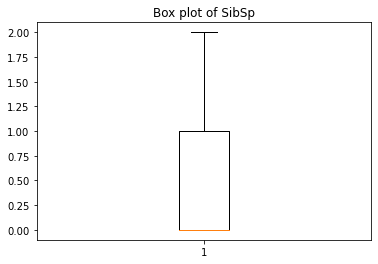

In [43]:
plt.boxplot(d1['SibSp'])
plt.title("Box plot of SibSp")

### Checking and handling missing values of Fare column

Text(0.5, 1.0, 'Box plot of fare')

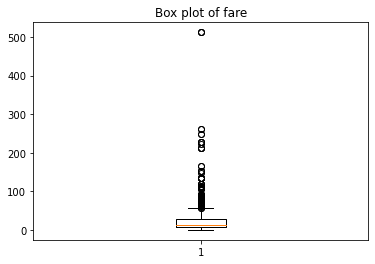

In [44]:
plt.boxplot(d1['Fare'])
plt.title("Box plot of fare")

In [45]:
Q1=np.percentile(d1['Fare'],25,interpolation='midpoint')
Q2=np.percentile(d1['Fare'],50,interpolation='midpoint')
Q3=np.percentile(d1['Fare'],75,interpolation='midpoint')

In [46]:
print(Q1)
print(Q2)
print(Q3)

7.8958
13.0
27.75


In [47]:
d1['Fare'].median()

13.0

In [48]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("Lower limit of fare column",low_lim)
print("Upper limit of fare column ",up_lim)

Lower limit of fare column -21.885499999999997
Upper limit of fare column  57.5313


In [49]:
outlier=[]
for x in d1['Fare']:
    if(x>up_lim)or(x<low_lim):
        outlier.append(x)

In [50]:
print('There are',len(outlier),'Outliers in Fare column','\n')
print('Outliers are:',outlier)

There are 102 Outliers in Fare column 

Outliers are: [71.2833, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 61.175, 63.3583, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 61.3792, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 247.5208, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 135.6333, 57.9792, 153.4625, 133.65, 66.6, 134.5, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 59.4, 93.5, 57.9792, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 120.0, 93.5, 83.1583, 89.1042, 164.8667]


In [51]:
ind1=(d1['Fare']>up_lim)
d1.loc[ind1].index

Int64Index([  2,  32,  35,  53,  62,  63,  73,  93,  98, 103,
            ...
            760, 764, 766, 780, 790, 803, 821, 836, 850, 857],
           dtype='int64', name='PassengerId', length=102)

In [52]:
print(*d1.loc[ind1].index, sep=',')

2,32,35,53,62,63,73,93,98,103,119,121,125,140,152,156,216,219,225,231,246,257,258,259,263,270,291,292,300,307,308,311,312,319,320,326,330,333,335,337,338,370,374,376,378,381,386,391,394,413,436,446,454,485,487,497,499,505,506,514,521,524,528,538,541,545,551,558,559,582,586,592,610,616,628,642,646,656,661,666,680,682,690,699,701,709,717,731,738,742,743,755,760,764,766,780,790,803,821,836,850,857


In [53]:
d1.drop([2,32,35,53,62,63,73,93,98,103,119,121,125,140,152,156,216,219,
         225,231,246,257,258,259,263,270,291,292,300,307,308,311,312,319,
         320,326,330,333,335,337,338,370,374,376,378,381,386,391,394,413,436
         ,446,454,485,487,497,499,505,506,514,521,524,528,538,541,545,551,558,559,582,586,
         592,610,616,628,642,646,656,661,666,680,682,690,699,701,709,717,731,738,742,743,755,
         760,764,766,780,790,803,821,836,850,857],inplace=True)

Text(0.5, 1.0, 'box plot of fare')

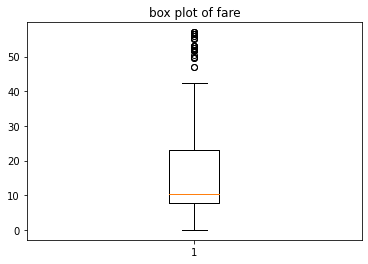

In [54]:
plt.boxplot(d1['Fare'])
plt.title("box plot of fare")

In [55]:
d1.shape

(684, 11)

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [56]:
d1.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [57]:
d1['Name'].nunique()


684

In [58]:
d1['Embarked'].nunique()

3

In [59]:
d1['Cabin'].nunique()

72

In [60]:
x = d1.drop(['Survived','Name','Sex','Cabin','Ticket','Embarked'],axis=1)

In [61]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,684.000000,684.000000,684.000000,684.000000,684.000000
mean,2.504386,28.612573,0.271930,0.267544,16.317275
std,0.714816,9.438662,0.500982,0.755690,12.611508
min,1.000000,3.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,33.000000,0.000000,0.000000,23.062500
max,3.000000,54.000000,2.000000,6.000000,57.000000


In [62]:
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)

In [63]:
x=pd.DataFrame(x)

x.describe()

,0,1,2,3,4
count,684.000000,684.000000,684.000000,684.000000,684.000000
mean,0.752193,0.502207,0.135965,0.044591,0.286268
std,0.357408,0.185072,0.250491,0.125948,0.221255
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.392157,0.000000,0.000000,0.137793
50%,1.000000,0.490196,0.000000,0.000000,0.184211
75%,1.000000,0.588235,0.000000,0.000000,0.404605
max,1.000000,1.000000,1.000000,1.000000,1.000000


### KARUNNIA MENON M - DSA NORKA BATCH-3